# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [168]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-03-31 17:13:50--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc08fe8af8bce8d1d8f202645294.dl.dropboxusercontent.com/cd/0/inline/CQJeOpqUBxk7YwJ2O1XES_WY0RKqz6y5s3D25Gefzvc80z7iAY2CuRxIDcrQYDY6nz16rMj5ya0wgW01h0D897MFjGIJziWhUmpXGO-sSkOB-zq-CDUhakXb4_RNk8CwebEKlK4w_d1_cF29nl3iqGLF/file# [following]
--2024-03-31 17:13:51--  https://uc08fe8af8bce8d1d8f202645294.dl.dropboxusercontent.com/cd/0/inline/CQJeOpqUBxk7YwJ2O1XES_WY0RKqz6y5s3D25Gefzvc80z7iAY2CuRxIDcrQYDY6nz16rMj5ya0wgW01h0D897MFjGIJziWhUmpXGO-sSkOB-zq-CDUhakXb4_RNk8CwebEKlK4w_d1_cF29nl3iqGLF/file
Resolving uc08fe8af8bce8d1d8f202645294.dl.dropboxusercontent.com (uc08fe8af8bce8d1d8f202645294.dl.dropboxusercontent.com)... 162.125.6.15, 2620:

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [169]:
file_path = '/HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value
housing_data = pd.read_csv(file_path)
housing_data.fillna(housing_data.mean(), inplace=True)
print(housing_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  


Get a brief description of the dataset

In [170]:
# TODO: you can use .info() and .description()
print(housing_data.info())
print(housing_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [171]:
# TODO: drop MEDV and convert to numpy array
features_array = housing_data.drop(columns=['MEDV']).values
print(type(features_array))
print(features_array)

<class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

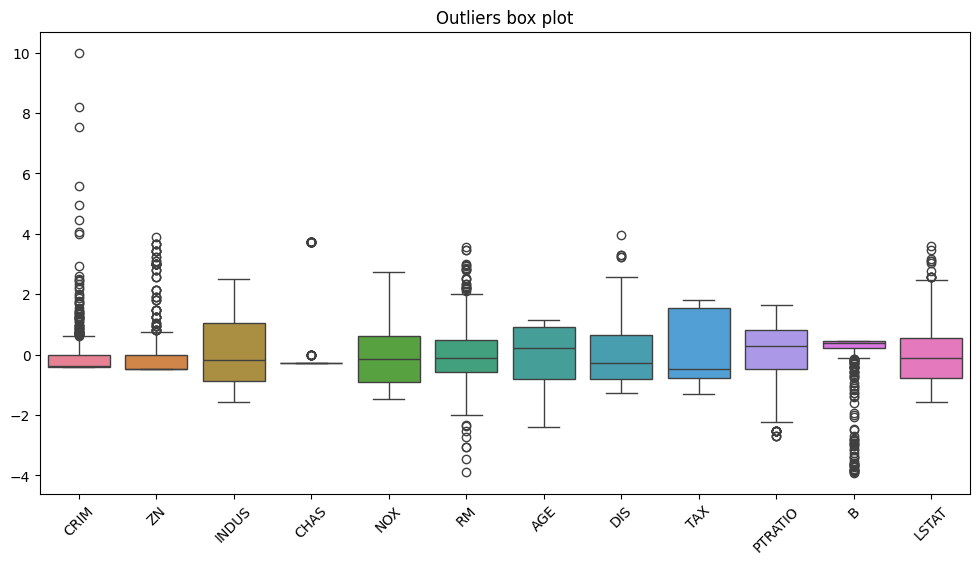

In [172]:
scaled_features = StandardScaler().fit_transform(features_array)
scaled_data = data=pd.DataFrame(scaled_features, columns=housing_data.columns[:-1])
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_data)
plt.title("Outliers box plot")
plt.xticks(rotation=45)
plt.show()

add polynomial features to increase model complexity!



In [173]:
degree = 2
poly = PolynomialFeatures(degree=degree)
poly_features = poly.fit_transform(scaled_features)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [174]:
# TODO: extract the MEDV
y = housing_data['MEDV'].values
print(type(y))
print(y[:5])

<class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2]




Split the dataset into two parts such that the training set contains 80% of the samples.

In [175]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [176]:
# TODO: Use sklearn
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

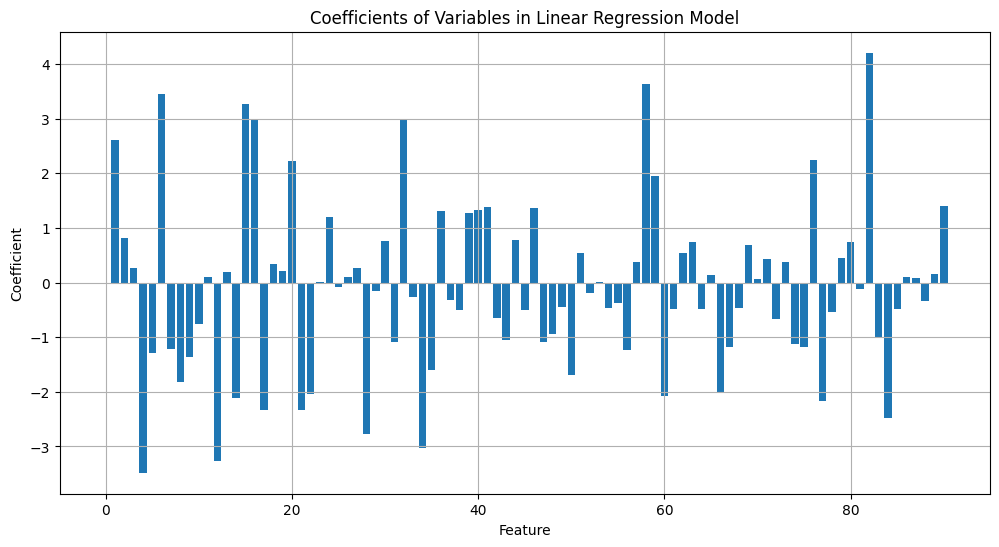

In [177]:
coefficients = linear_regressor.coef_

plt.figure(figsize=(12, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients of Variables in Linear Regression Model')
plt.grid(True)
plt.show()

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [178]:
# TODO: Calculate R² score and MSE on the training dataset
r2_train_linear = linear_regressor.score(X_train, y_train)
y_train_pred = linear_regressor.predict(X_train)
mse_train_linear = mean_squared_error(y_train, y_train_pred)

print("R² score on training dataset:", r2_train_linear)
print("Mean Squared Error (MSE) on training dataset:", mse_train_linear)

R² score on training dataset: 0.9233615957926449
Mean Squared Error (MSE) on training dataset: 6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [179]:
y_test_pred = linear_regressor.predict(X_test)
y_test_pred

array([26.60760472, 39.62214268, 18.71401934, 21.00627478, 15.36932115,
       18.14967249, 19.2680689 , 14.04520907, 20.41411804, 19.68358046,
       19.34721612, 17.80080883,  9.52923494, 17.56130221, 17.61765281,
       23.1886407 , 19.83784911,  9.82571722, 48.00938013, 13.01200313,
       24.67113881, 28.75366122, 15.14797668, 19.48768303, 16.8711114 ,
       16.54597743, 17.07120558, 13.34377675, 16.66485127, 19.34855953,
       18.50229727, 23.95889069, 15.48239335, 25.70102382, 13.69224402,
       17.48588361, 33.1589375 , 20.10130817, 20.24277819, 21.68697931,
       16.91569466, 31.33039866, 53.78155342, 15.35787882, 27.30502419,
       15.90970181, 14.76748839, 23.49841731, 17.57527936, 29.19894908,
       19.95253249, 33.61207695, 17.02933983, 26.86934524, 44.01327048,
       23.0722288 , 13.43102214, 32.42020215, 25.15187612, 12.20309801,
       25.03914004, 29.01333968, 31.99975955, 14.25741358, 27.2478974 ,
       13.81980117, 14.35877776, 24.56841459, 29.12596225, 12.07

# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [180]:
# TODO: Use Lasso from sklearn library
lasso_regressor = Lasso(alpha=0.5, max_iter=10000)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.5, max_iter=10000)

Get the coefficients of the variables and visualize it.

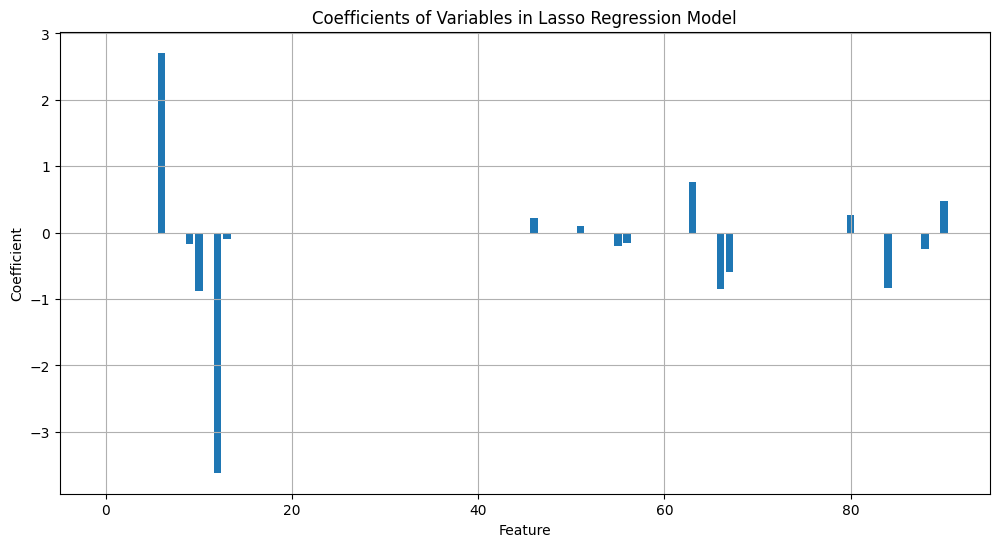

In [181]:
# Get the coefficients of the variables from the trained Lasso regression model
lasso_coefficients = lasso_regressor.coef_
plt.figure(figsize=(12, 6))
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients of Variables in Lasso Regression Model')
plt.grid(True)
plt.show()


1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    Your Answer Goes here.

- It shows a sparser distribution of coefficients while applying L1 regularization. The reason is because L1 regularization pushes coeeficients of less important features towards exact value of zero.

- a higher regularization parameter, causes elimination of more features, leading to a simpler model with less features.

Get the score value on train *dataset*


In [182]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred_lasso = lasso_regressor.predict(X_train)

# Calculate R² score on the training dataset
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

# Calculate Mean Squared Error (MSE) on the training dataset
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)

# Output the R² score and MSE on the training dataset
print("R² score on training dataset (Lasso):", r2_train_lasso)
print("Mean Squared Error (MSE) on training dataset (Lasso):", mse_train_lasso)

R² score on training dataset (Lasso): 0.8171286694481938
Mean Squared Error (MSE) on training dataset (Lasso): 15.88665494849732


Predict the value of "y" for each "x" belonging to the "testing" set

In [183]:
y_test_pred_lasso = lasso_regressor.predict(X_test)
y_test_pred_lasso

array([25.01553605, 32.02170508, 16.56431707, 23.67545781, 17.13464034,
       21.69118954, 18.08272601, 14.79576716, 20.40693987, 19.6387817 ,
       21.53217387, 19.92343501,  6.64235117, 21.28994714, 19.61841959,
       22.15653103, 18.10047426, 11.57157362, 42.41465504, 16.42067495,
       21.39943226, 25.60136064, 15.78693485, 22.04815612, 17.9021186 ,
       17.00238679, 19.88982538, 13.39822411, 21.17351703, 19.18396855,
       18.45930572, 24.45954182, 22.28497567, 22.26103013, 14.87175003,
       17.51351063, 32.12600448, 20.57590791, 22.56516819, 20.96313305,
       15.55620789, 27.56743981, 44.34319575, 18.69292057, 24.52131935,
       17.12080258, 16.94276939, 24.60012608, 18.02835641, 28.77188928,
       21.29219328, 31.99034286, 17.89886858, 25.3993675 , 39.45589001,
       22.16073425, 17.33354312, 28.94005254, 23.43768009, 17.00480941,
       24.78746672, 31.5308728 , 28.44268606, 19.11754198, 26.06453555,
       17.74025689, 17.46661041, 24.07595784, 27.21904407, 12.41

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [197]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge(alpha=10.0)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=10.0)

Get the coefficients of the variables and visualize it.

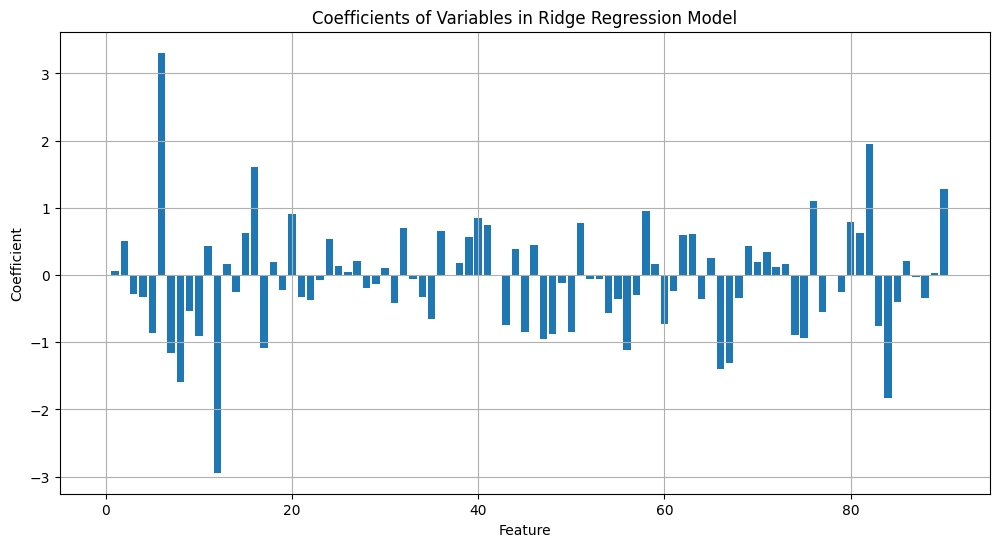

In [198]:
ridge_coefficients = ridge_regressor.coef_

# Visualize the coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(ridge_coefficients)), ridge_coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients of Variables in Ridge Regression Model')
plt.grid(True)
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

        Your answer goes here
  
  - L1 regularization pushes some coefficients to exactly zero which leads to sparsity and elimination of less important features.

  - In L2 regularization, cosfficients are shrinked towards zero, without enforcing the exact value of 0. In this regularization, no feature gets eliminated, instead magnitude of their coffiecient decreases which leads to a smoother and more stable model.

  - Based on the previous explanation, L1 regularization usually produces coefficients with varying magnitudes in compare to L2 regularization. Also, the magnitude of coefficients in L2 regularization tends to be less in compare to L1 regularization.

  - In L1 regularization, higher alpha causes higher regularization penalty, leading more coefficients to become exactly zero (elimination of more features). Meanwhile, in L2 regularization, higher alpha leads to smaller coefficients without enforcing them toward exactly zero.

Get the score value on train *dataset*

In [199]:
y_pred_train_scaled = ridge_regressor.predict(X_train)
r2_train_ridge = r2_score(y_train, y_pred_train_scaled)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_scaled)

print("R² score on training dataset (Ridge):", r2_train_ridge)
print("Mean Squared Error (MSE) on training dataset (Ridge):", mse_train_ridge)

R² score on training dataset (Ridge): 0.7816105936679527
Mean Squared Error (MSE) on training dataset (Ridge): 18.972231089123802


Predict the value of "y" for each "x" belonging to the "testing" set



In [200]:
y_test_pred_ridge = ridge_regressor.predict(X_test)
y_test_pred_ridge

array([26.64874045, 37.58387034, 19.27657644, 21.94197185, 15.3028101 ,
       20.12028532, 19.06550135, 13.09220054, 21.53629599, 19.59853597,
       19.98066811, 17.71773856,  7.45618135, 19.4698435 , 17.83085991,
       22.41342776, 19.03460611, 10.83733093, 47.87734976, 13.23733086,
       25.94978663, 28.67626209, 15.62739061, 20.87266644, 16.88618107,
       16.70243714, 18.15202381, 12.99400863, 19.06044753, 19.1619615 ,
       18.49185044, 23.96483655, 16.81029968, 24.22140047, 14.71608764,
       17.14764076, 33.00621736, 20.36005585, 21.56765845, 22.00579786,
       16.87716829, 30.83029389, 52.86535583, 16.40416721, 26.70438602,
       16.00962769, 15.37456958, 24.22203195, 18.0413712 , 28.35774744,
       18.65466298, 33.07812494, 17.01116837, 25.34703163, 43.22198358,
       23.00525594, 14.66623572, 32.34427145, 25.00498764, 14.21572885,
       24.95594853, 33.4162596 , 30.78344757, 16.16942493, 25.19231399,
       16.02456508, 14.58662856, 24.41159615, 30.32473275, 12.38

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [201]:
# HINT: Use DataFrame tools
mse_test_linear = mean_squared_error(y_test, linear_regressor.predict(X_test))
r2_test_linear = linear_regressor.score(X_test, y_test)

mse_test_lasso = mean_squared_error(y_test, lasso_regressor.predict(X_test))
r2_test_lasso = lasso_regressor.score(X_test, y_test)

mse_test_ridge = mean_squared_error(y_test, ridge_regressor.predict(X_test))
r2_test_ridge = ridge_regressor.score(X_test, y_test)

summarized_data = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'Train R² Score': [r2_train_linear, r2_train_lasso, r2_train_ridge],
    'Test R² Score': [r2_test_linear, r2_test_lasso, r2_test_ridge],
    'Train MSE': [mse_train_linear, mse_train_lasso, mse_train_ridge],
    'Test MSE': [mse_test_linear, mse_test_lasso, mse_test_ridge]
}

df_summary = pd.DataFrame(summarized_data)
print(df_summary)

               Model  Train R² Score  Test R² Score  Train MSE   Test MSE
0  Linear Regression        0.923362       0.752882   6.657839  18.122077
1   Lasso Regression        0.817129       0.778718  15.886655  16.227427
2   Ridge Regression        0.781611       0.793955  18.972231  15.110037


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

          your answer goes here.

 - The Ridge Regression model performed best on the test data, achieving the minimum MSE and maximum R² score.

- On train data, Linear Regression model shows the best performance with highest R² score and lowest MSE. However, when it comes to test data, it shows a worse performance in compare to other methods, which shows that the Linear Regression model overfitted on the training data.

- On the other hand, we can observe that Lasso Regression model and Ridge regression model have better performance on test data in compare to Linear Regression model, which show that they support better generalization on unseen data. In other words, these models trade off some training performance for better generalization.
        
- Another parameter in performance of Lasso regularization and Ridge regularization is the alpha. Higher value of alpha leads to a stronger regularization. In L1 regularization a higher alpha causes sparser models and in L2 regularization a higher alpha makes the penalty on the square of coefficients more significant. In both techniques, a higher alpha leads to a simpler model which has better generalization but may lead to underfitting of the model.